In [2]:
#导入数据分析及可视化过程需要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

Illegal line #1
	"{\rtf1\ansi\ansicpg936\cocoartf1671\cocoasubrtf200
"
	in file "/Users/ousei/.matplotlib/matplotlibrc"
Illegal line #2
	"{\fonttbl\f0\fnil\fcharset0 Menlo-Regular;}
"
	in file "/Users/ousei/.matplotlib/matplotlibrc"
Illegal line #3
	"{\colortbl;\red255\green255\blue255;\red0\green0\blue0;\red255\green255\blue255;}
"
	in file "/Users/ousei/.matplotlib/matplotlibrc"
Illegal line #4
	"{\*\expandedcolortbl;;\cssrgb\c0\c0\c0;\cssrgb\c100000\c100000\c100000;}
"
	in file "/Users/ousei/.matplotlib/matplotlibrc"
Illegal line #5
	"\paperw11900\paperh16840\margl1440\margr1440\vieww10800\viewh8400\viewkind0
"
	in file "/Users/ousei/.matplotlib/matplotlibrc"
Illegal line #6
	"\deftab720
"
	in file "/Users/ousei/.matplotlib/matplotlibrc"
Illegal line #7
	"\pard\pardeftab720\sl260\partightenfactor0
"
	in file "/Users/ousei/.matplotlib/matplotlibrc"
Illegal line #9
	"\f0\fs22 \cf2 \cb3 \expnd0\expndtw0\kerning0
"
	in file "/Users/ousei/.matplotlib/matplotlibrc"

Bad key "\outl0\stroke

In [3]:
#win
#data_train = pd.read_csv('D:\DS\data\\train.csv')
#data_testa = pd.read_csv('D:\DS\data\\testA.csv')

#mac
data_train = pd.read_csv('/Users/ousei/Documents/数据分析/Datawhale/data/train.csv')
data_testa = pd.read_csv('/Users/ousei/Documents/数据分析/Datawhale/data/testA.csv')

In [3]:
data_train_sample = pd.read_csv("D:\DS\data\\train.csv",nrows=5)

#设置chunkersize参数，来控制每次迭代数据的大小
chunker = pd.read_csv("D:\DS\data\\train.csv",chunksize=5)

In [4]:
#查看数据集的样本个数和原始特征难度
data_testa.shape

(200000, 46)

In [5]:
data_train.shape

(800000, 47)

In [6]:
data_train.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

特征表 特征工程

- id	为贷款清单分配的唯一信用证标识
- loanAmnt	贷款金额
- term	贷款期限（year）
- interestRate	贷款利率
- installment	分期付款金额
- grade	贷款等级
- subGrade	贷款等级之子级
- employmentTitle	就业职称
- employmentLength	就业年限（年）
- homeOwnership	借款人在登记时提供的房屋所有权状况
- annualIncome	年收入
- verificationStatus	验证状态
- issueDate	贷款发放的月份
- purpose	借款人在贷款申请时的贷款用途类别
- postCode	借款人在贷款申请中提供的邮政编码的前3位数字
- regionCode	地区编码
- dti	债务收入比
- delinquency_2years	借款人过去2年信用档案中逾期30天以上的违约事件数
- ficoRangeLow	借款人在贷款发放时的fico所属的下限范围
- ficoRangeHigh	借款人在贷款发放时的fico所属的上限范围
- openAcc	借款人信用档案中未结信用额度的数量
- pubRec	贬损公共记录的数量
- pubRecBankruptcies	公开记录清除的数量
- revolBal	信贷周转余额合计
- revolUtil	循环额度利用率，或借款人使用的相对于所有可用循环信贷的信贷金额
- totalAcc	借款人信用档案中当前的信用额度总数
- initialListStatus	贷款的初始列表状态
- applicationType	表明贷款是个人申请还是与两个共同借款人的联合申请
- earliesCreditLine	借款人最早报告的信用额度开立的月份
- title	借款人提供的贷款名称
- policyCode	公开可用的策略_代码=1新产品不公开可用的策略_代码=2
- n系列匿名特征	匿名特征n0-n14，为一些贷款人行为计数特征的处理

In [7]:
#通过info熟悉数据模型
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [8]:
#总体粗略的查看数据集各个特征的一些基本统计量
data_train.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252013,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [9]:
#头五行与后五行
data_train.head(3).append(data_train.tail(3))    

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
799997,799997,6000.0,3,13.33,203.12,C,C3,2582.0,10+ years,1,...,4.0,26.0,4.0,10.0,4.0,5.0,0.0,0.0,1.0,4.0
799998,799998,19200.0,3,6.92,592.14,A,A4,151.0,10+ years,0,...,10.0,6.0,12.0,22.0,8.0,16.0,0.0,0.0,0.0,5.0
799999,799999,9000.0,3,11.06,294.91,B,B3,13.0,5 years,0,...,3.0,4.0,4.0,8.0,3.0,7.0,0.0,0.0,0.0,2.0


In [12]:
#有22个colums（特征）有缺失值
data_train.isnull().any().sum()

22

In [19]:
#进一步查看缺失特征中缺失率大于50%的特征
have_null_fea_dict = (data_train.isnull().sum()/len(data_train)).to_dict()
fea_null_moreThanHalf = {}
for key,value in have_null_fea_dict.items():
    if value > 0.05:
        fea_null_moreThanHalf[key] = value

In [20]:
fea_null_moreThanHalf

{'employmentLength': 0.05849875,
 'n0': 0.0503375,
 'n1': 0.0503375,
 'n2': 0.0503375,
 'n3': 0.0503375,
 'n5': 0.0503375,
 'n6': 0.0503375,
 'n7': 0.0503375,
 'n8': 0.05033875,
 'n9': 0.0503375,
 'n11': 0.08719,
 'n12': 0.0503375,
 'n13': 0.0503375,
 'n14': 0.0503375}

In [18]:
print(have_null_fea_dict)

{'id': 0.0, 'loanAmnt': 0.0, 'term': 0.0, 'interestRate': 0.0, 'installment': 0.0, 'grade': 0.0, 'subGrade': 0.0, 'employmentTitle': 1.25e-06, 'employmentLength': 0.05849875, 'homeOwnership': 0.0, 'annualIncome': 0.0, 'verificationStatus': 0.0, 'issueDate': 0.0, 'isDefault': 0.0, 'purpose': 0.0, 'postCode': 1.25e-06, 'regionCode': 0.0, 'dti': 0.00029875, 'delinquency_2years': 0.0, 'ficoRangeLow': 0.0, 'ficoRangeHigh': 0.0, 'openAcc': 0.0, 'pubRec': 0.0, 'pubRecBankruptcies': 0.00050625, 'revolBal': 0.0, 'revolUtil': 0.00066375, 'totalAcc': 0.0, 'initialListStatus': 0.0, 'applicationType': 0.0, 'earliesCreditLine': 0.0, 'title': 1.25e-06, 'policyCode': 0.0, 'n0': 0.0503375, 'n1': 0.0503375, 'n2': 0.0503375, 'n3': 0.0503375, 'n4': 0.04154875, 'n5': 0.0503375, 'n6': 0.0503375, 'n7': 0.0503375, 'n8': 0.05033875, 'n9': 0.0503375, 'n10': 0.04154875, 'n11': 0.08719, 'n12': 0.0503375, 'n13': 0.0503375, 'n14': 0.0503375}


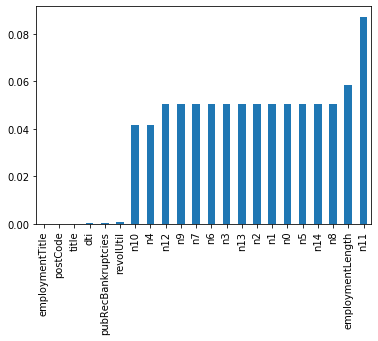

In [15]:
#具体的查看缺失特征及缺失率
#nan 可视化
missing = data_train.isnull().sum()/len(data_train)
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [6]:
#查看训练集测试集中特征属性只有一值的特征
one_value_fea = [col for col in data_train.columns if data_train[col].nunique() <=1]

In [7]:
one_value_fea

['policyCode']

In [8]:
one_value_fea_test = [col for col in data_testa.columns if data_testa[col].nunique() <=1]

In [9]:
one_value_fea_test

['policyCode']

policyCode 公开可用的策略代码=1

In [3]:
pd.set_option('display.max_columns', 50) 
data_train.head(10)

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,2,2014-07-01,1,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,46000.0,2,2012-08-01,0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,May-2002,1723.0,1.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,74000.0,2,2015-10-01,0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,May-2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,118000.0,1,2015-08-01,0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,May-1999,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,29000.0,2,2016-03-01,0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,Aug-1977,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0
5,5,11000.0,3,7.99,344.65,A,A5,51727.0,7 years,0,39000.0,2,2017-04-01,0,9,512.0,21,17.14,0.0,730.0,734.0,19.0,0.0,0.0,4047.0,31.1,52.0,1,0,Jul-1998,10.0,1.0,12.0,1.0,2.0,2.0,1.0,1.0,48.0,2.0,3.0,2.0,19.0,0.0,0.0,0.0,0.0
6,6,2050.0,3,7.69,63.95,A,A4,180083.0,9 years,0,35000.0,0,2014-10-01,0,0,517.0,14,17.49,0.0,755.0,759.0,12.0,0.0,0.0,3111.0,8.5,23.0,0,0,Oct-2006,0.0,1.0,0.0,1.0,3.0,3.0,7.0,11.0,3.0,10.0,18.0,3.0,12.0,0.0,0.0,0.0,3.0
7,7,11500.0,3,14.98,398.54,C,C3,214017.0,1 year,1,30000.0,2,2014-01-01,0,0,100.0,4,32.60,0.0,665.0,669.0,8.0,1.0,1.0,14021.0,59.7,33.0,1,0,Dec-1994,0.0,1.0,0.0,4.0,4.0,4.0,4.0,16.0,10.0,5.0,21.0,4.0,8.0,0.0,0.0,0.0,2.0
8,8,12000.0,3,12.99,404.27,C,C2,188.0,5 years,2,60000.0,1,2016-05-01,1,0,792.0,13,19.22,0.0,690.0,694.0,15.0,0.0,0.0,27176.0,46.0,21.0,1,0,Apr-1994,0.0,1.0,0.0,7.0,13.0,13.0,7.0,7.0,2.0,13.0,17.0,11.0,15.0,NaN,0.0,0.0,6.0
9,9,6500.0,3,10.99,212.78,B,B4,54.0,NaN,1,15300.0,2,2015-11-01,0,0,59.0,11,24.39,0.0,725.0,729.0,7.0,0.0,0.0,2936.0,30.6,63.0,0,0,Jan-1993,0.0,1.0,0.0,4.0,5.0,5.0,4.0,21.0,24.0,6.0,39.0,5.0,7.0,0.0,0.0,0.0,8.0


In [4]:
#查看特征的数值类型有哪些,对象类型有哪些,对象类型有哪些
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)
numerical_fea

['id',
 'loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'isDefault',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'title',
 'policyCode',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

In [5]:
category_fea = list(filter(lambda x: x not in numerical_fea,list(data_train.columns)))
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [6]:
data_train.grade

0         E
1         D
2         D
3         A
4         C
         ..
799995    C
799996    A
799997    C
799998    A
799999    B
Name: grade, Length: 800000, dtype: object

In [16]:
#数值型变量分析,数值型肯定是包括连续型变量和离散型标量
#过滤数值型类别特征
def get_numerical_serial_fea(data,feas):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()  #返回的是唯一值的个数
        if temp<=10:
            numerical_noserial_fea.append(fea)
            continue
        numerical_serial_fea.append(fea)
    return numerical_serial_fea,numerical_noserial_fea
numerical_serial_fea,numerical_noserial_fea = get_numerical_serial_fea(data_train,numerical_fea)

In [17]:
numerical_serial_fea

['id',
 'loanAmnt',
 'interestRate',
 'installment',
 'employmentTitle',
 'annualIncome',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n13',
 'n14']